In [1]:
###### import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
#import emcee
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.time import Time
import lightkurve as lk
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
df = pd.read_csv('C:/Users/jojoa/GitHub/disperse/data/preliminary_results_He.csv')

In [3]:
df

,date,ew,ew_unc,gaussian_width,gaussian_width_unc,int_wv,jd,obs_line_center,obs_line_center_unc,qidx,star_name,time
0,2/24/2021,0.518537,0.023111,0.887745,0.033723,10830,2459269.955,10829.83231,0.050104,8486,hat-p-67b,10:55:40
1,2/24/2021,0.520775,0.011185,1.002463,0.020762,10830,2459269.962,10829.85967,0.021940,8486,hat-p-67b,11:04:43
2,4/28/2020,0.321303,0.012598,0.791798,0.034299,10830,2458967.757,10829.96395,0.033709,6437,HAT-P-67b_IN_1,6:10:31
3,4/28/2020,0.341680,0.016330,0.801452,0.039125,10830,2458967.761,10829.95732,0.041642,6437,HAT-P-67b_IN_1,6:16:12
4,4/28/2020,0.380583,0.018648,0.797788,0.039206,10830,2458967.765,10830.04742,0.044027,6437,HAT-P-67b_IN_1,6:21:53
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2/1/2021,0.440921,0.006403,0.950946,0.013725,10830,2459247.025,10829.80784,0.014173,8486,hat-p-67b,12:36:08
95,2/26/2021,0.460999,0.010083,1.000522,0.023499,10830,2459271.936,10829.79765,0.022085,8486,hat-p-67b,10:28:30
96,2/26/2021,0.467579,0.009399,1.017283,0.023066,10830,2459271.943,10829.76492,0.019399,8486,hat-p-67b,10:37:34
97,3/4/2021,0.298803,0.007327,0.757333,0.019325,10830,2459277.929,10829.61106,0.019732,8486,hat-p-67b,10:18:26


In [4]:
pd.set_option('display.max_rows', None)  

In [5]:
df_bool=df['ew']<0

In [6]:
df

,date,ew,ew_unc,gaussian_width,gaussian_width_unc,int_wv,jd,obs_line_center,obs_line_center_unc,qidx,star_name,time
0,2/24/2021,0.518537,0.023111,0.887745,0.033723,10830,2459269.955,10829.83231,0.050104,8486,hat-p-67b,10:55:40
1,2/24/2021,0.520775,0.011185,1.002463,0.020762,10830,2459269.962,10829.85967,0.021940,8486,hat-p-67b,11:04:43
2,4/28/2020,0.321303,0.012598,0.791798,0.034299,10830,2458967.757,10829.96395,0.033709,6437,HAT-P-67b_IN_1,6:10:31
3,4/28/2020,0.341680,0.016330,0.801452,0.039125,10830,2458967.761,10829.95732,0.041642,6437,HAT-P-67b_IN_1,6:16:12
4,4/28/2020,0.380583,0.018648,0.797788,0.039206,10830,2458967.765,10830.04742,0.044027,6437,HAT-P-67b_IN_1,6:21:53
5,4/28/2020,0.341721,0.013034,0.761265,0.030886,10830,2458967.769,10829.85362,0.031517,6437,HAT-P-67b_IN_1,6:27:34
6,4/28/2020,1.055947,0.490253,3.140694,1.498257,10830,2458967.773,10831.88348,1.250571,6437,HAT-P-67b_IN_1,6:33:15
7,4/28/2020,0.322965,0.009108,0.796197,0.025362,10830,2458967.777,10829.98813,0.023606,6437,HAT-P-67b_IN_1,6:38:57
8,4/28/2020,0.308050,0.007363,0.772279,0.021190,10830,2458967.781,10829.93534,0.019670,6437,HAT-P-67b_IN_1,6:44:38
9,4/28/2020,0.335687,0.008161,0.847920,0.024370,10830,2458967.785,10830.00060,0.020668,6437,HAT-P-67b_IN_1,6:50:19


In [7]:
df['ew'].mean()

0.38683343934343434

In [8]:
(df.date.value_counts())

6/15/2020    18
5/22/2020    14
4/28/2020    14
4/27/2020     4
6/16/2020     4
5/20/2020     4
4/29/2020     4
5/24/2020     4
5/23/2020     4
5/21/2020     4
6/18/2020     4
6/14/2020     4
6/13/2020     3
2/24/2021     2
2/1/2021      2
2/26/2021     2
1/31/2021     2
3/4/2021      2
8/1/2020      2
7/22/2020     2
Name: date, dtype: int64

In [9]:
df.star_name.value_counts()

HAT-P-67b_IN_1             14
HAT-P-67b_IN_2             14
hat-p-67b                  10
HAT-P-67b_OUT_same3         9
HAT-P-67b_IN_3              9
HAT-P-67b_OUT_2_before2     4
Hat-P-67                    4
HAT-P-67b_OUT_3_after1      4
HAT-P-67b_OUT_2_after2      4
HAT-P-67b_OUT_3_after2      4
HAT-P-67b_OUT_2_before1     4
HAT-P-67b_OUT_1_before1     4
HAT-P-67b_OUT_3_before1     4
HAT-P-67b_OUT_1_after1      4
HAT-P-67b_OUT_2_after1      4
HAT-P-67b_OUT_3_before2     3
Name: star_name, dtype: int64

We retrieved the data for the planets from [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/)

In [10]:
target_name = 'HAT-P-67b'
orbital_period = 4.81010250
t_c = 2455961.38467
t_c_btjd = t_c-2457000.0 #neg value means discovered before TESS

In [11]:
target_mask = df.star_name.str.contains(target_name)
df = df[target_mask]
keep_mask = df.ew_unc < 10 #original value = 1

In [12]:
df

,date,ew,ew_unc,gaussian_width,gaussian_width_unc,int_wv,jd,obs_line_center,obs_line_center_unc,qidx,star_name,time
2,4/28/2020,0.321303,0.012598,0.791798,0.034299,10830,2458967.757,10829.96395,0.033709,6437,HAT-P-67b_IN_1,6:10:31
3,4/28/2020,0.341680,0.016330,0.801452,0.039125,10830,2458967.761,10829.95732,0.041642,6437,HAT-P-67b_IN_1,6:16:12
4,4/28/2020,0.380583,0.018648,0.797788,0.039206,10830,2458967.765,10830.04742,0.044027,6437,HAT-P-67b_IN_1,6:21:53
5,4/28/2020,0.341721,0.013034,0.761265,0.030886,10830,2458967.769,10829.85362,0.031517,6437,HAT-P-67b_IN_1,6:27:34
6,4/28/2020,1.055947,0.490253,3.140694,1.498257,10830,2458967.773,10831.88348,1.250571,6437,HAT-P-67b_IN_1,6:33:15
7,4/28/2020,0.322965,0.009108,0.796197,0.025362,10830,2458967.777,10829.98813,0.023606,6437,HAT-P-67b_IN_1,6:38:57
8,4/28/2020,0.308050,0.007363,0.772279,0.021190,10830,2458967.781,10829.93534,0.019670,6437,HAT-P-67b_IN_1,6:44:38
9,4/28/2020,0.335687,0.008161,0.847920,0.024370,10830,2458967.785,10830.00060,0.020668,6437,HAT-P-67b_IN_1,6:50:19
10,4/28/2020,0.319466,0.007658,0.809898,0.023400,10830,2458967.789,10829.97309,0.020252,6437,HAT-P-67b_IN_1,6:56:00
11,4/28/2020,0.332024,0.008627,0.842567,0.026619,10830,2458967.793,10829.96892,0.022425,6437,HAT-P-67b_IN_1,7:01:41


In [13]:
df = df[keep_mask]
in_transit_mask = df.star_name.str.contains('_IN')

In [14]:
df['ew']=df.ew.astype(np.float).values #change str to float
df['btjd']=df['jd']-2457000.0 #cut down JD to smaller scale

In [15]:
sn_ratio=2
good_data_mask=(df.ew/df.ew_unc)>sn_ratio #signal to noise ratio

In [16]:
df=df[good_data_mask]

In [17]:
x_line=df['ew'].median() #calculate horizontal line going between in/out of transit points
x_line

0.27370371

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

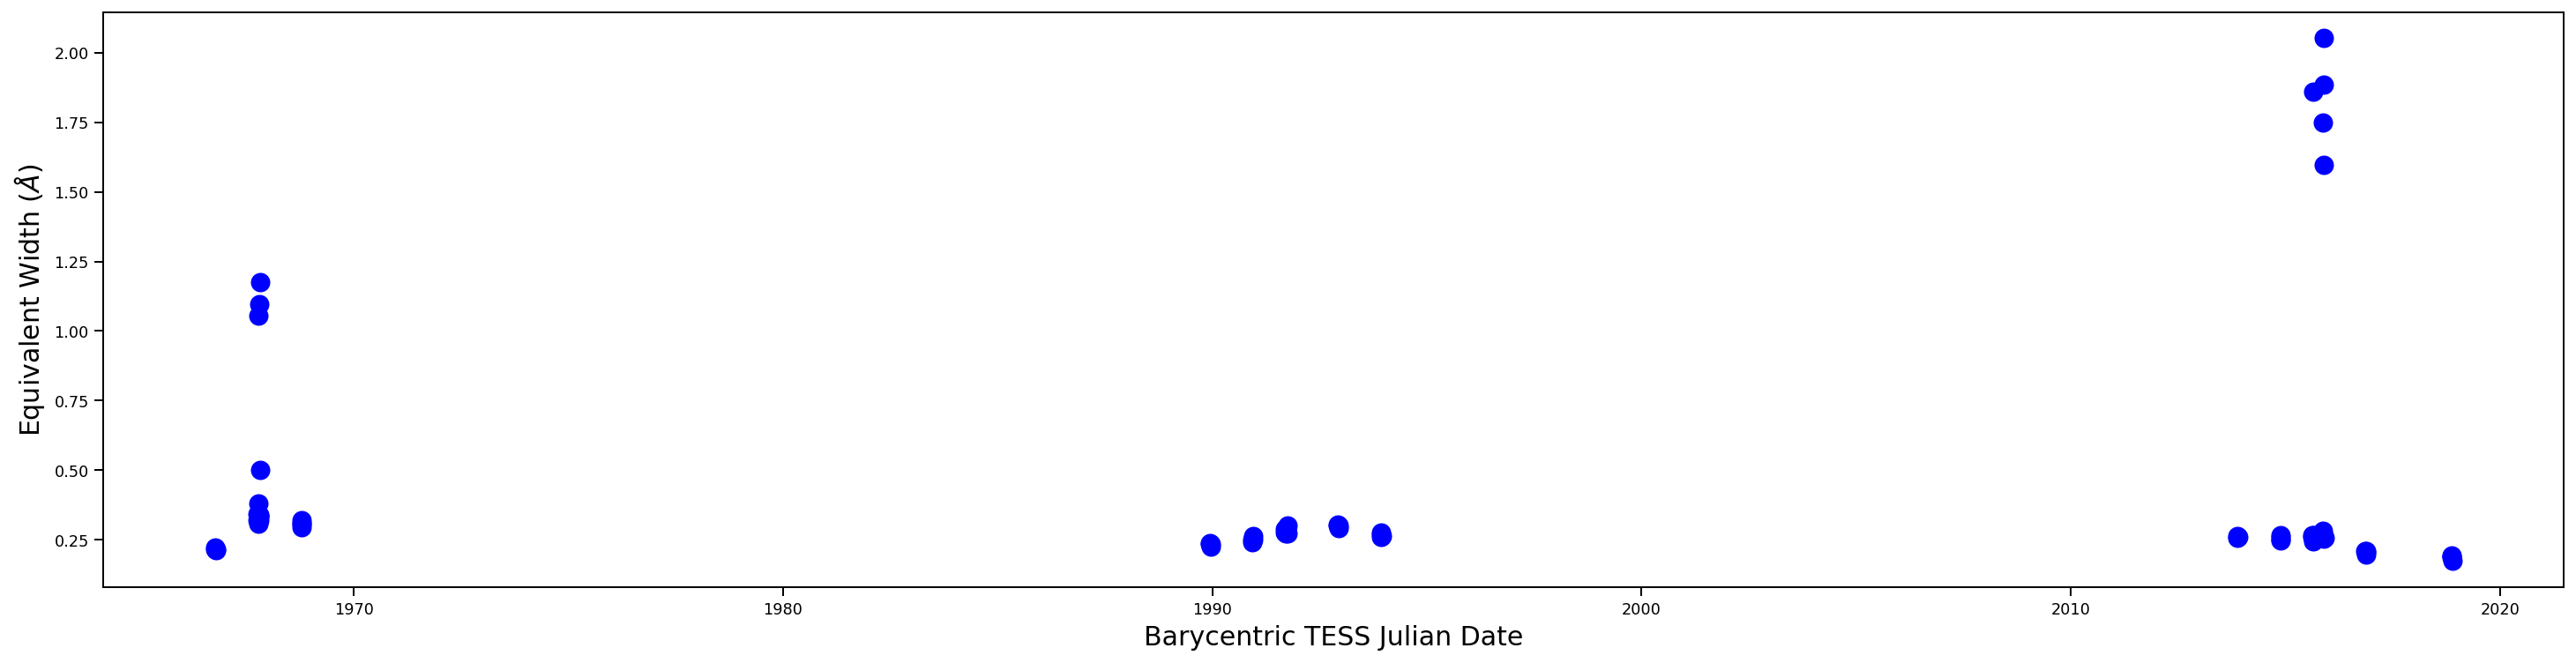

In [18]:
plt.figure(figsize=(25,6))
#plt.errorbar(df.btjd, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.btjd, df.ew, 'bo', markersize=10)
plt.xlabel('Barycentric TESS Julian Date', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)

Text(0, 0.5, 'Equivalent Width ($\\AA$)')

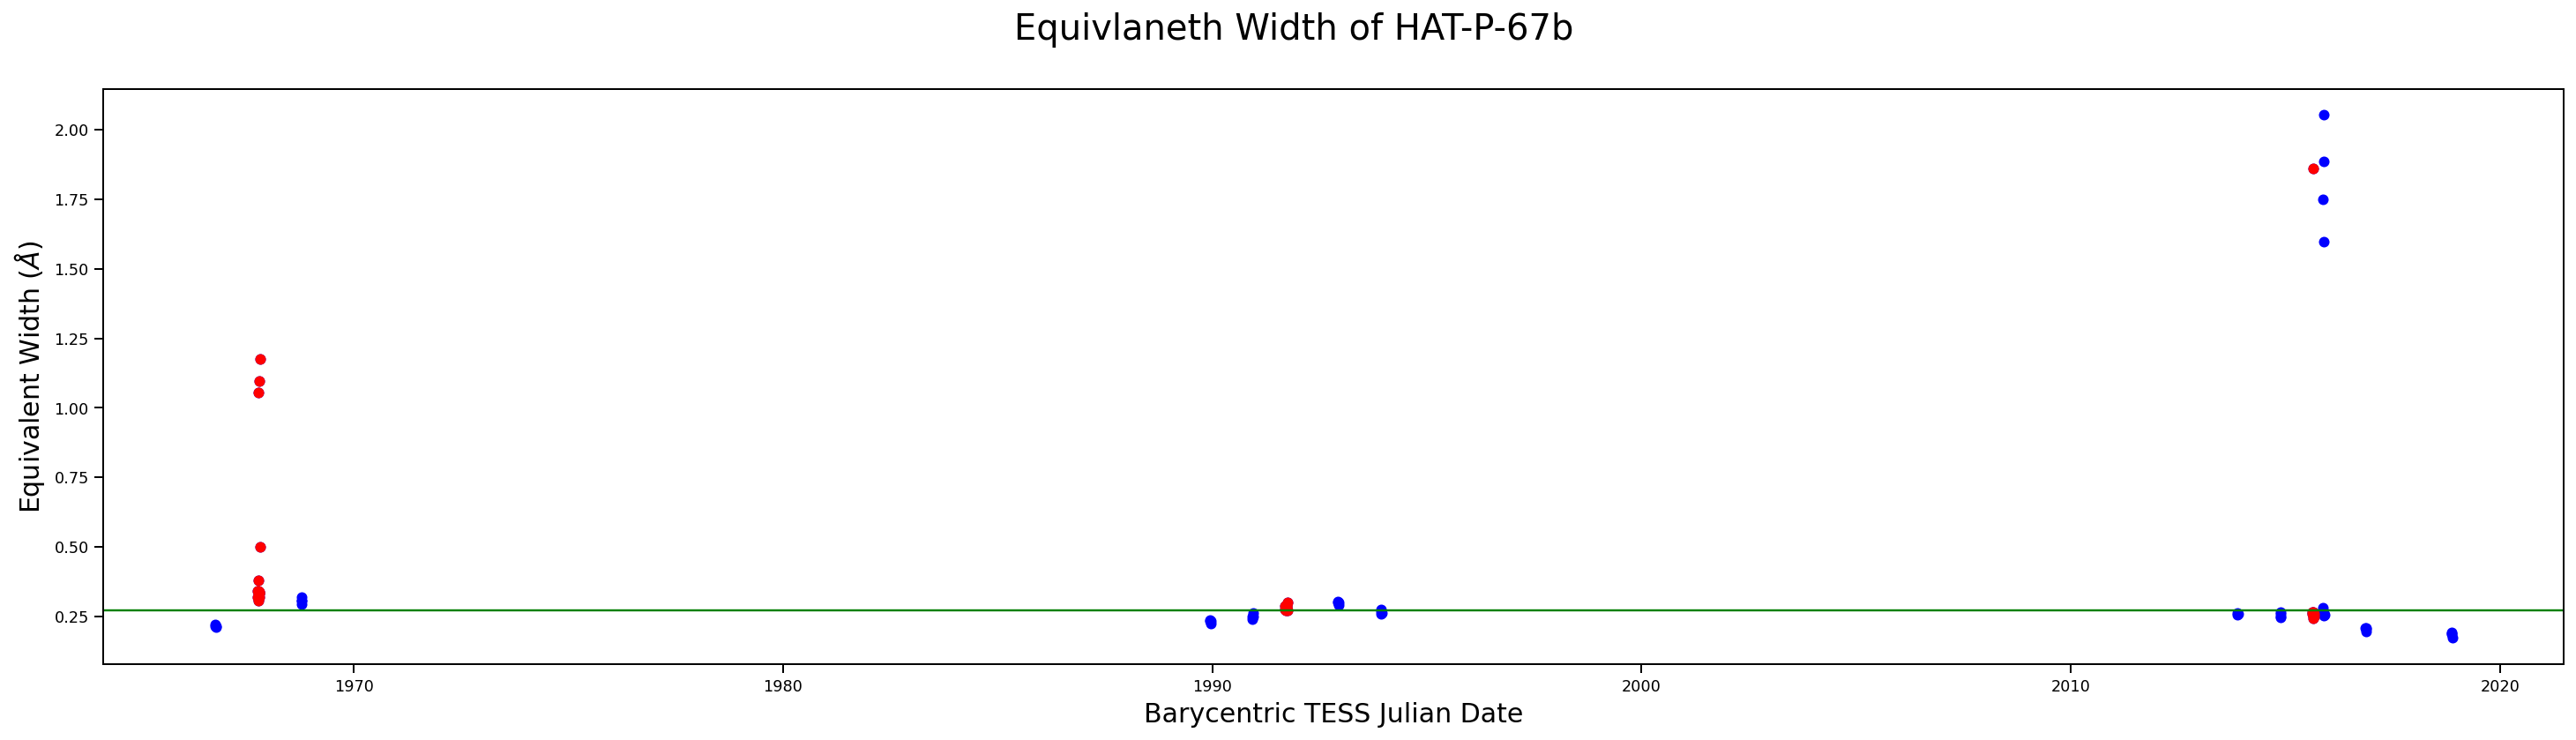

In [19]:
plt.figure(figsize=(25,6))
#plt.errorbar(df.btjd, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.btjd, df.ew, 'bo', markersize=5)
plt.plot(df.btjd[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=5) #change index to jd for time
#plt.ylim(0)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Barycentric TESS Julian Date', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

Let's compute the normalized phase shifted so that the transit midpoint always occurs at zero while also seeing the light curve before and after the midpoint.

$$\phi=\frac{\mod(t-T_c+\frac{P}{2}\;,P)}{P} -0.5$$ 

In [20]:
df['phase']=np.mod(df.btjd-t_c_btjd+(orbital_period*0.5),orbital_period)-0.5*orbital_period
df['normalized_phase']=(df['phase']/orbital_period)

In [21]:
df.describe() #max less than orbital period, normalized less than 1

,ew,ew_unc,gaussian_width,gaussian_width_unc,int_wv,jd,obs_line_center,obs_line_center_unc,qidx,btjd,phase,normalized_phase
count,85.000000,85.000000,85.000000,85.000000,85.0,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.392275,0.025910,0.987800,0.059690,10830.0,2.458995e+06,10830.388841,0.058587,6686.729412,1994.993412,-0.094610,-0.019669
std,0.397618,0.091929,0.862262,0.207162,0.0,1.929105e+01,0.935073,0.209372,211.975032,19.291053,0.969214,0.201496
min,0.173351,0.004312,0.539491,0.011732,10830.0,2.458967e+06,10829.853620,0.012774,6436.000000,1966.770000,-1.914758,-0.398070
25%,0.250719,0.005311,0.673922,0.014984,10830.0,2.458969e+06,10830.043810,0.015995,6438.000000,1968.786000,-0.808245,-0.168031
50%,0.273704,0.006690,0.720055,0.019309,10830.0,2.458992e+06,10830.104090,0.019593,6589.000000,1991.743000,-0.014245,-0.002961
75%,0.305992,0.008266,0.755678,0.025362,10830.0,2.459016e+06,10830.237370,0.023606,6939.000000,2015.650000,0.099243,0.020632
max,2.052061,0.694536,3.987558,1.498257,10830.0,2.459019e+06,10834.066490,1.505591,6943.000000,2018.886000,2.194755,0.456280


Text(0, 0.5, 'Equivalent Width ($\\AA$)')

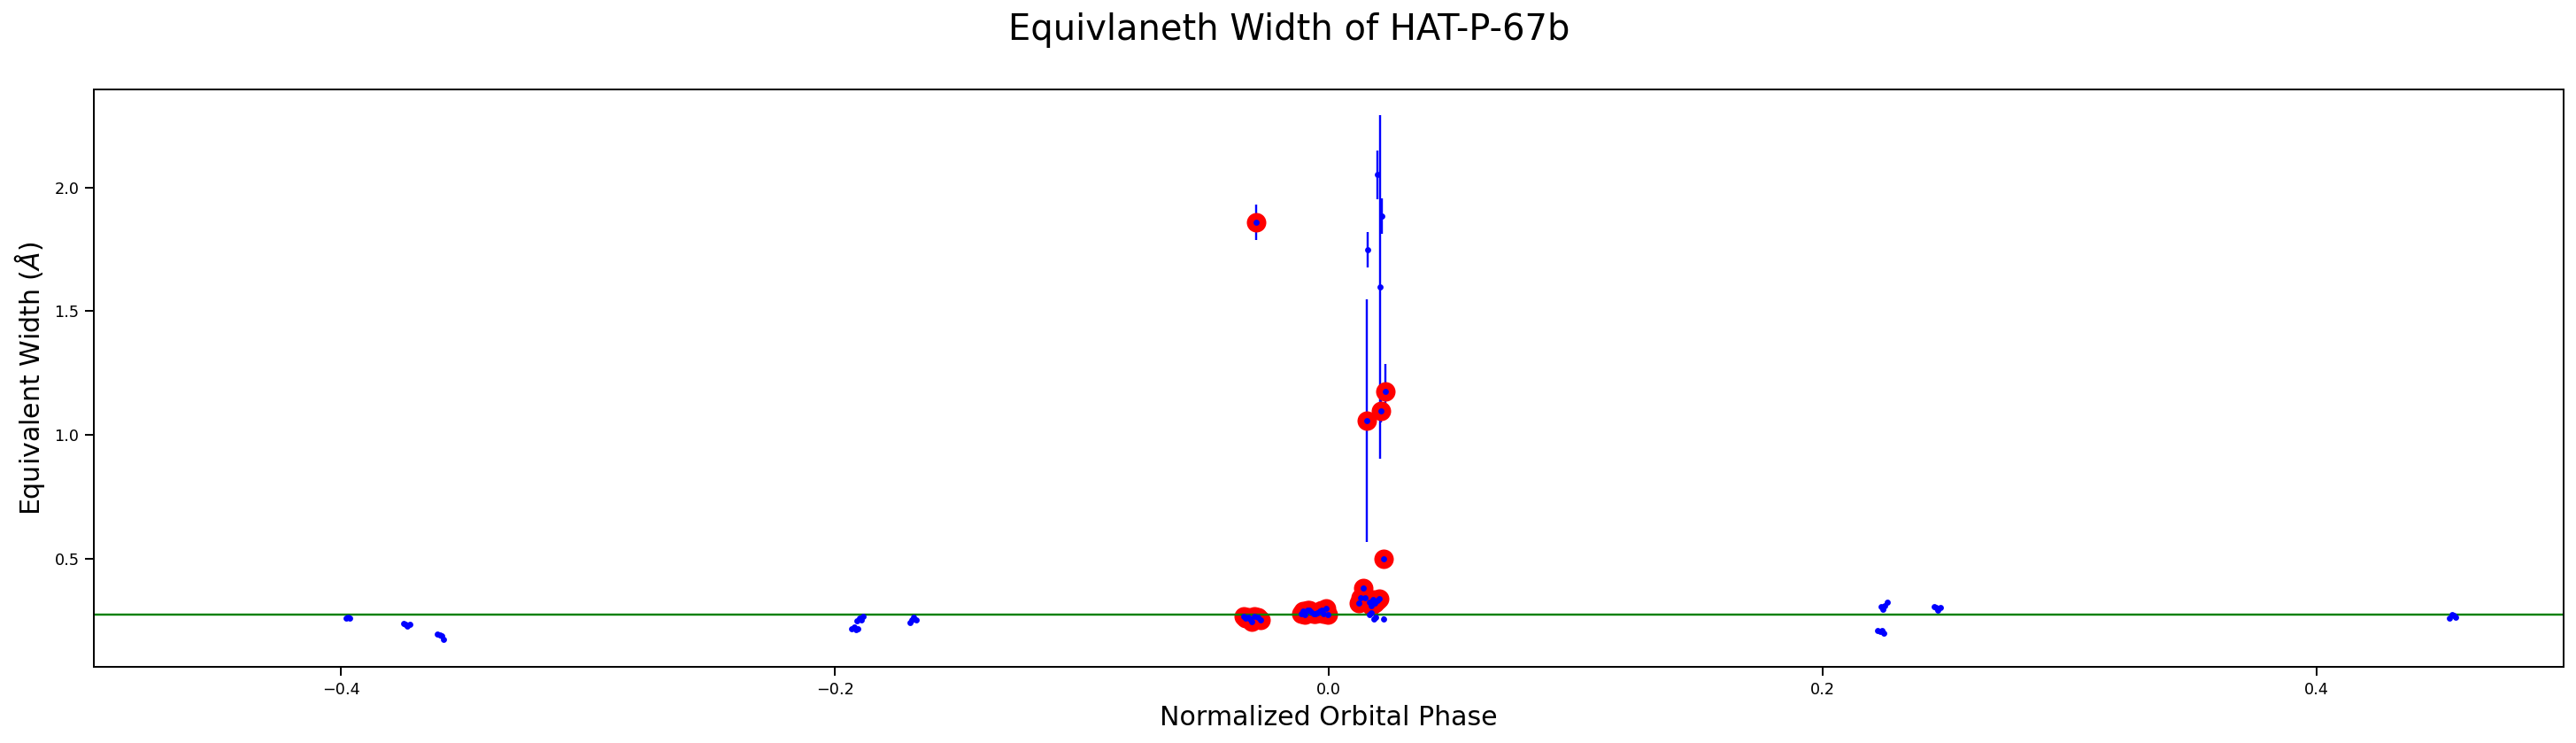

In [22]:
plt.figure(figsize=(25,6))

plt.errorbar(df.normalized_phase, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.normalized_phase[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.errorbar(df.normalized_phase-1, df.ew, yerr=df.ew_unc, fmt='b.')
#plt.plot(df.normalized_phase[in_transit_mask]-1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.errorbar(df.normalized_phase+1, df.ew, yerr=df.ew_unc, fmt='b.')
#plt.plot(df.normalized_phase[in_transit_mask]+1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.ylim(0.9,1.32)
plt.xlim(-.5,.5)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '../figures/HAT-P-67b.jpg'

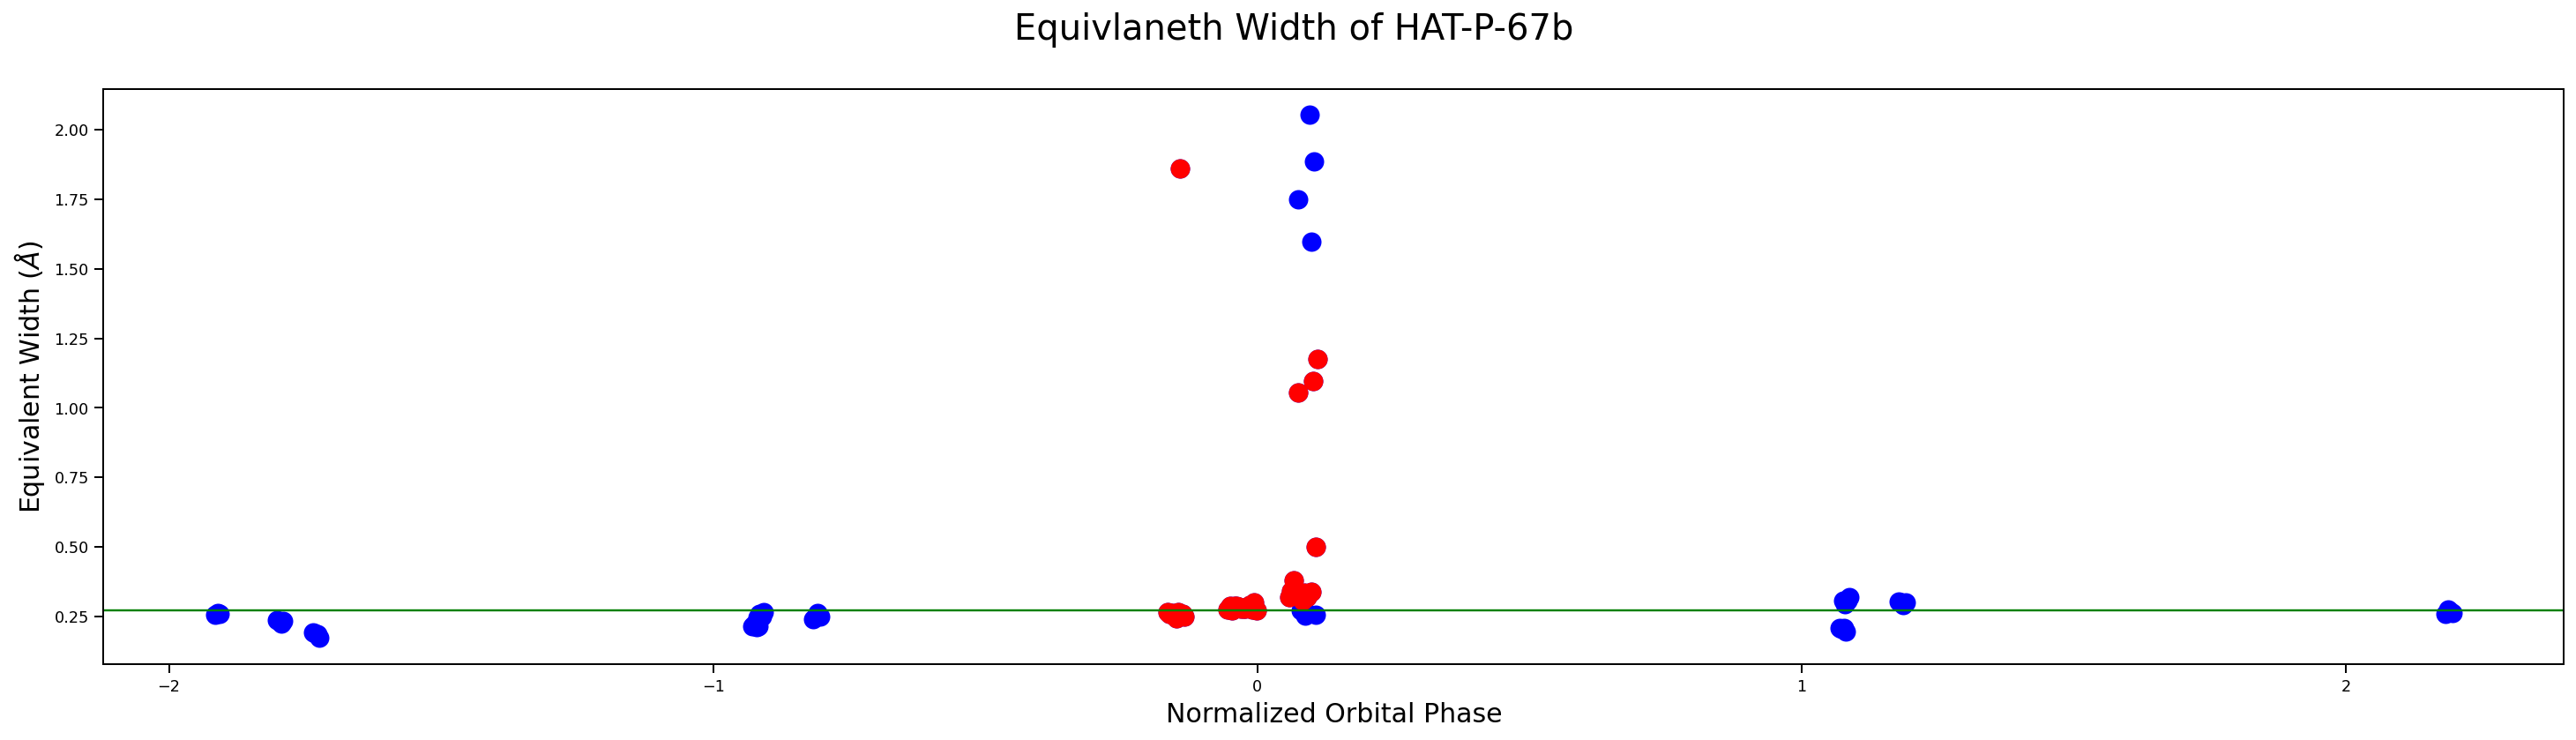

In [58]:
plt.figure(figsize=(25,6))

plt.plot(df.phase, df.ew, 'bo', markersize=10)
plt.plot(df.phase[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.plot(df.normalized_phase-1, df.ew, 'bo', markersize=10)
#plt.plot(df.normalized_phase[in_transit_mask]-1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.plot(df.normalized_phase+1, df.ew, 'bo', markersize=10)
#plt.plot(df.normalized_phase[in_transit_mask]+1, df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time

#plt.ylim(0.9,1.32)
#plt.xlim(-2,2)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
plt.savefig(f'../figures/{target_name}.jpg')

Let's define a variable called 'shifted' in two steps.

In [ ]:
second_half_mask = df.normalized_phase > 0.5
first_half_mask = ~second_half_mask

In [ ]:
df['shifted']=df.normalized_phase
df.shifted[second_half_mask]=df.shifted[second_half_mask]-1
df.shifted[second_half_mask]

In [ ]:
plt.figure(figsize=(25,6))
plt.errorbar(df.shifted, df.ew, yerr=df.ew_unc, fmt='b.')
plt.plot(df.shifted[in_transit_mask], df.ew[in_transit_mask],'ro',markersize=10) #change index to jd for time
#plt.ylim(0.9,1.32)
plt.xlim(0,1)
plt.axhline(x_line,color = 'green')
plt.suptitle(f'Equivlaneth Width of {target_name}', fontsize=20)
plt.xlabel('Normalized Orbital Phase', fontsize=15)
plt.ylabel('Equivalent Width ($\AA$)', fontsize=15)
#plt.savefig(f'../figures/{target_name}.jpg')

# Light curve analysis with TESS

In [61]:
sr = lk.search_lightcurve(target_name)
lc_raw = sr[1].download()

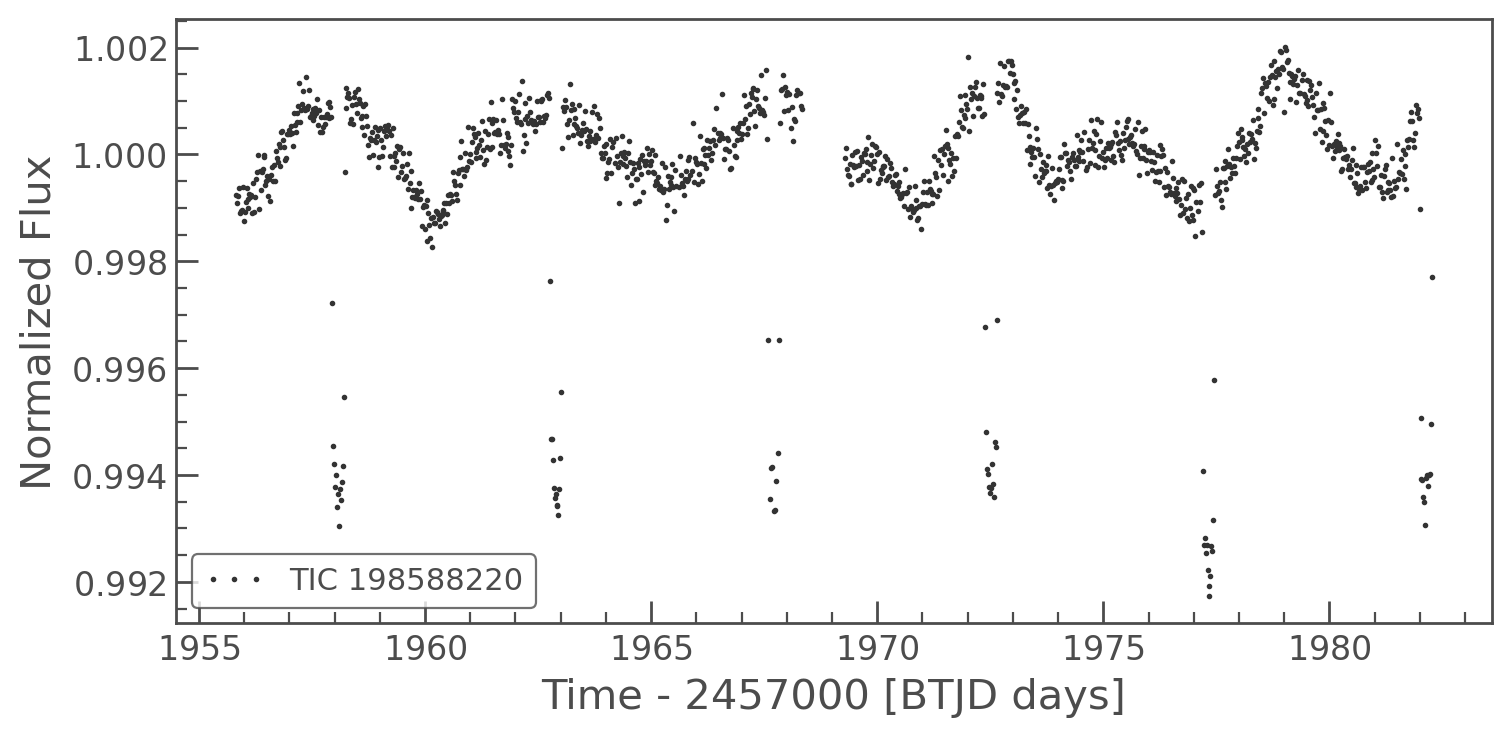

In [62]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

(-0.5, 0.5)

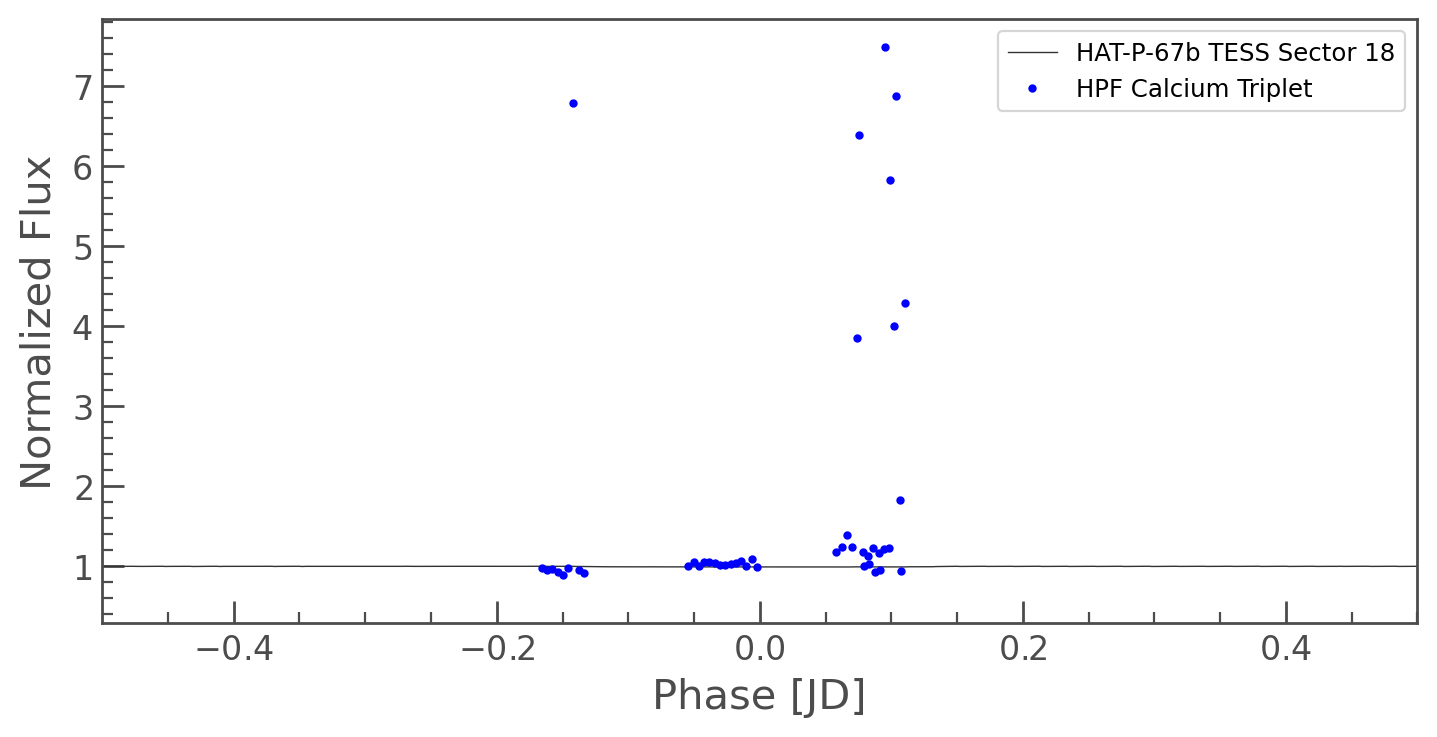

In [67]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()
ax = lc_folded.plot(label = target_name+' TESS Sector 18')
plt.plot(df.phase, df.ew/np.median(df.ew), 'bo', markersize=2, label = 'HPF Helium Triplet')
plt.legend()
plt.xlim(-.5,.5)
#plt.ylim(0)
#plt.savefig(f'../figures/TESS_EW_{target_name}_1.jpg')

# Exploring different exposure times in the same sector

In [41]:
sr = lk.search_lightcurve(target_name)
lc_raw = sr[0].download()

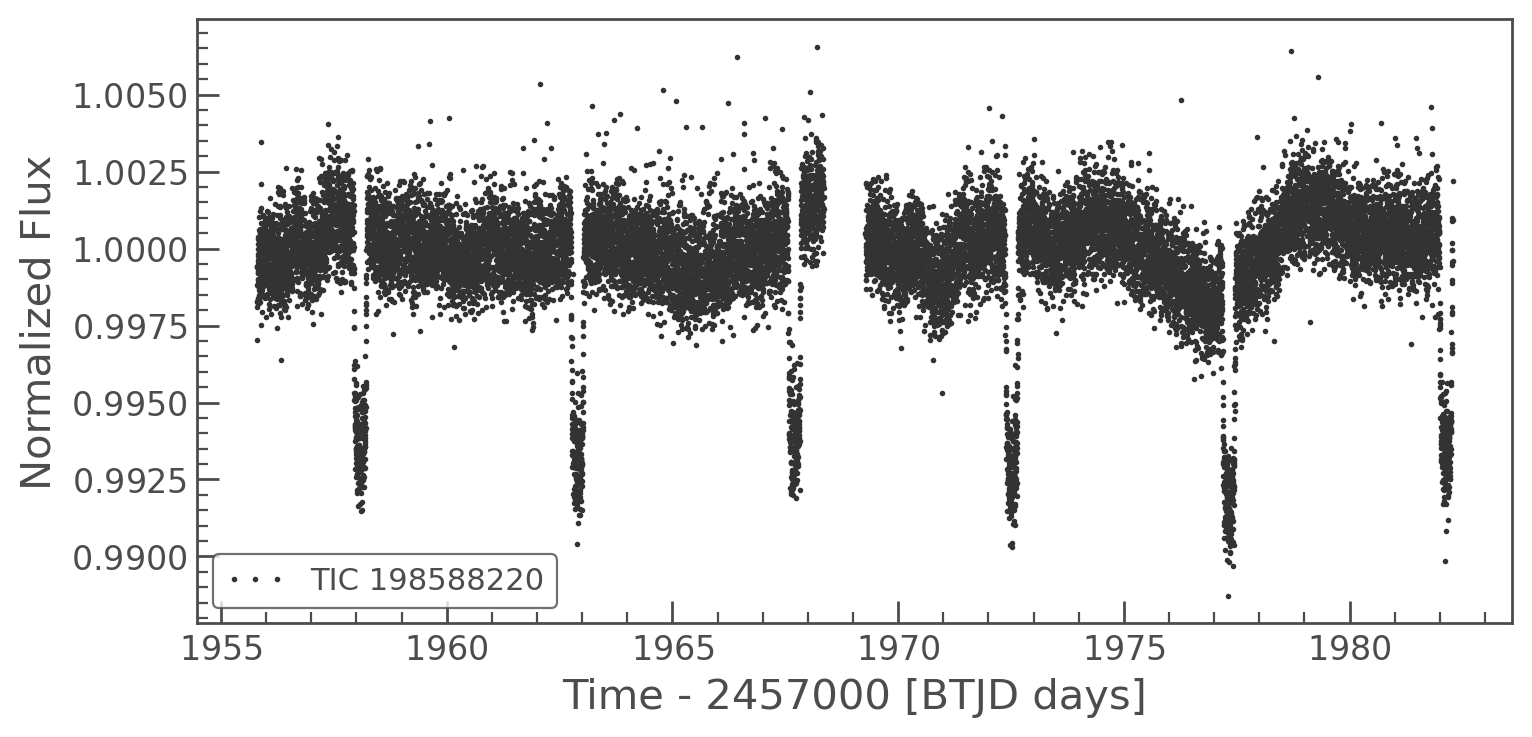

In [42]:
ax = lc_raw.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

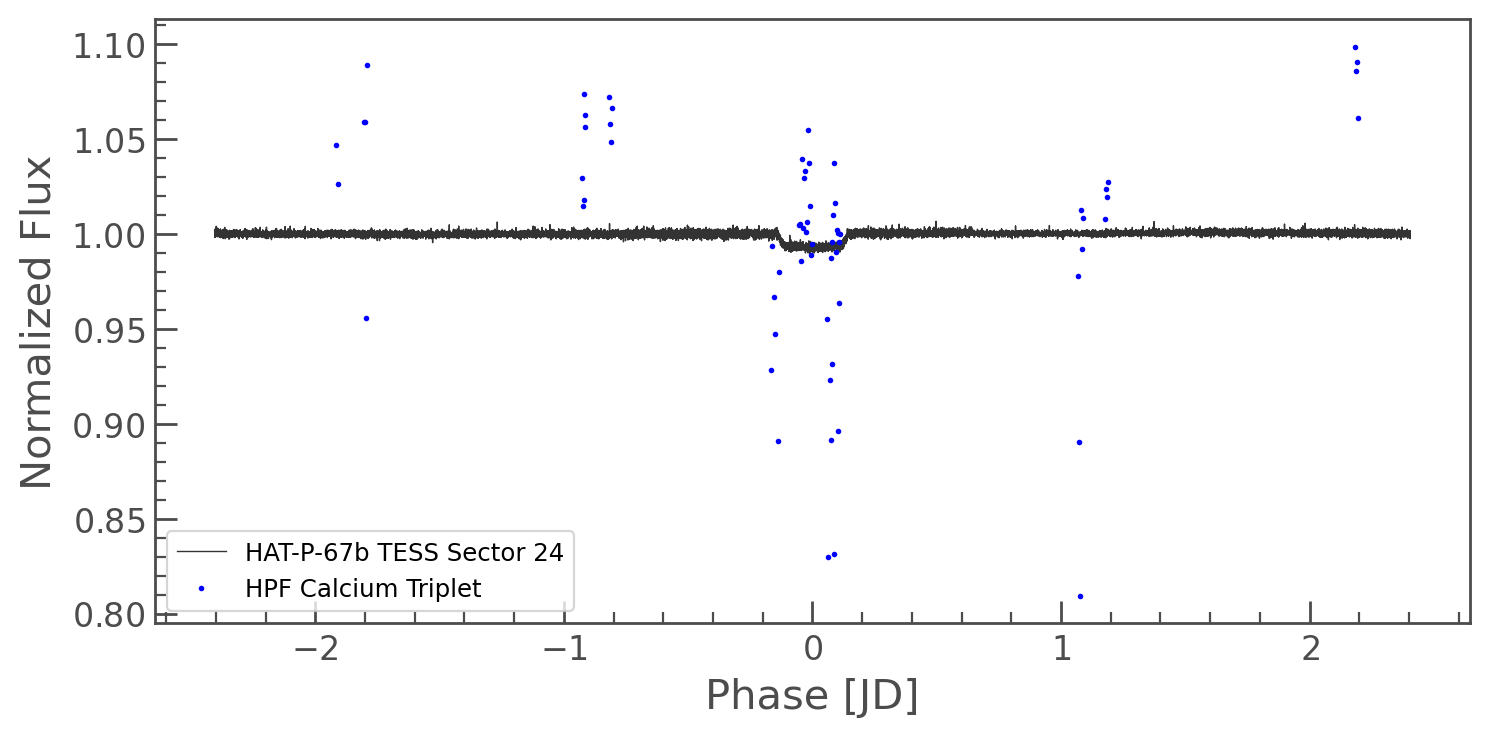

In [44]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()
ax = lc_folded.plot(label = target_name+' TESS Sector 24')
plt.plot(df.phase, df.ew/np.mean(df.ew), 'bo', markersize=1, label = 'HPF Calcium Triplet')
plt.legend()
#plt.savefig(f'../figures/TESS_EW_{target_name}_0.jpg')
#ew bc of MCMC has very large error bars and gives us a noisy plot